# Applying Numpy for Sound Data

In [10]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import matplotlib.pyplot as plt

## Creating a soundwave

Physically, sound is an oscillation of a mechanical medium that makes the surrounding air also oscillate and transport the sound as a compression wave. Mathematically, the oscillations can be described as 
$$
s(t) = A\sin(ft 2\pi)
$$
where t is the time, and f the frequency of the oscillation.

In [11]:
# tone synthesis
def note(freq, le, amp=1, rate=44100):
    t = np.linspace(0,le,le*rate)
    data = np.sin(2*np.pi*freq*t)*amp
    return data.astype(np.int16) # two byte integers

# A tone, 2 seconds, 44100 samples per second
tone = note(440,2,amp=10000)

wavfile.write('440hzAtone.wav',44100,tone) # writing the sound to a file


In [12]:
ipd.Audio('440hzAtone.wav')

In [15]:
B = note(494, 1,amp=10000)
C = note(523, 1, amp = 10050)
D = note(587, 1, amp = 9000)
mus = np.concatenate((tone, B, C, D), axis=0)
wavfile.write('mymusic.wav', 44100, mus)

In [16]:
ipd.Audio('mymusic.wav')

## 3-d Plot

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

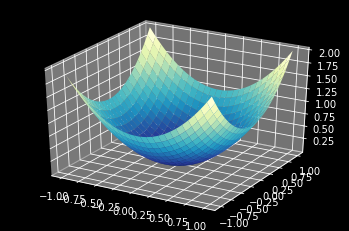

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
u = np.linspace(-1, 1, 100)
x, y = np.meshgrid(u, u)
z = x ** 2 + y ** 2
ax.plot_surface(x, y, z, rstride=4,cstride=4, cmap=cm.YlGnBu_r)
plt.show()

## Animation

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
    # t is a parameter 
    t = 0.1*i 

    # x, y values to be plotted 
    x = t*np.sin(t) 
    y = t*np.cos(t) 

    # appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=500, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('coil.gif',writer='imagemagick') 